Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Get the data

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA(Exploratory Data Analysis) (to see most of the missing data)

<AxesSubplot:>

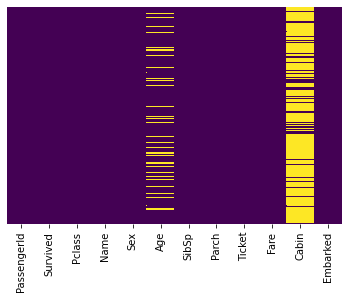

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

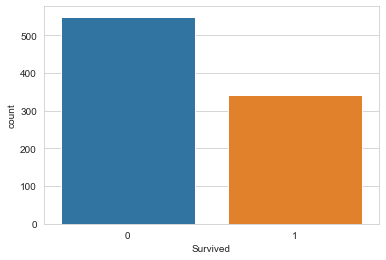

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

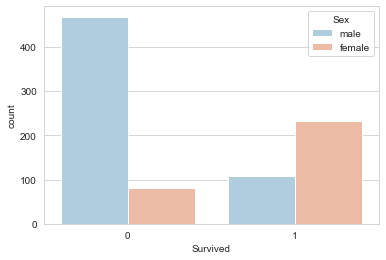

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

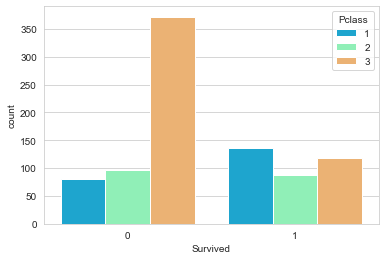

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\Ujan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

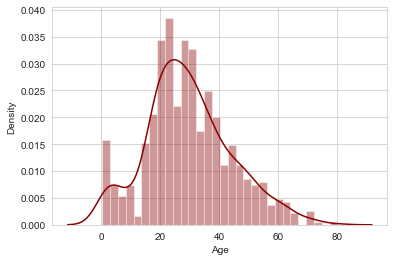

In [8]:
sns.distplot(train['Age'].dropna(), kde=True, bins=30, color='darkred')

<AxesSubplot:>

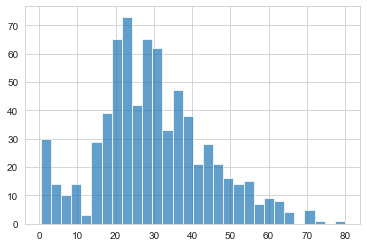

In [9]:
train['Age'].hist(bins=30, alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

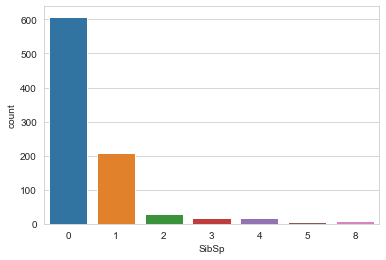

In [10]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

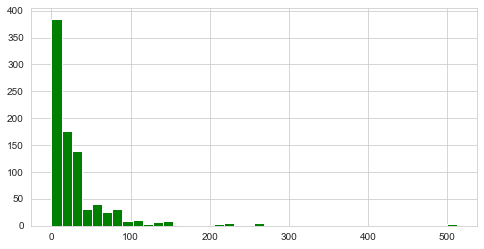

In [11]:
train['Fare'].hist(bins=40, color='green', figsize=(8,4))

Incase you want to use cufflinks for interactive plot

In [12]:
import cufflinks as cf

In [13]:
cf.go_offline()

In [14]:
train['Fare'].iplot(kind='hist', bins=40)

Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

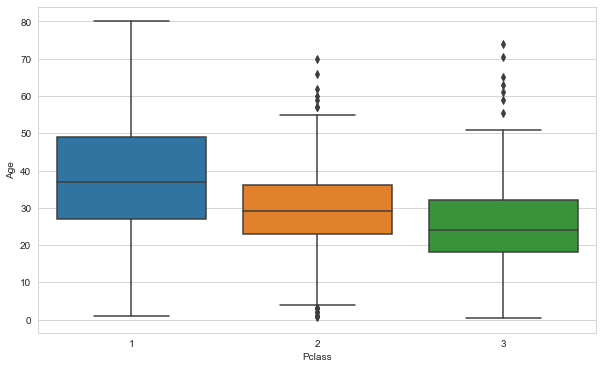

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

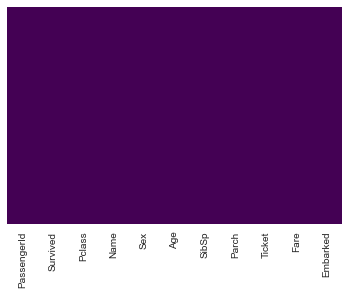

In [28]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [24]:
train.drop('Cabin', axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
train.dropna(inplace=True)

Converting Categorical Features

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [34]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [35]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [40]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [41]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [43]:
train = pd.concat([train,sex,embark],axis=1)

In [46]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [49]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [52]:
train.drop('PassengerId',axis=1,inplace=True)

In [53]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Building a Logistic Regression model

Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [56]:
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=101)

Training and Predicting

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Ujan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [59]:
predictions = model.predict(X_test)

Evaluation

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [63]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)